# TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading and Preprocessing DataFrame

In [2]:
# load the training data csv file into pandas dataframe
train_df = pd.read_csv("train.csv")
# show first five rows of the dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# load the test data csv file into a pandas dataframe
test_df = pd.read_csv("test.csv")
# show first five rows of the dataframe
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# show the number of records and attributes in the training dataframe
train_df.shape

(891, 12)

In [5]:
# show basic statistics about the dataframe
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# check if there are any null values in the dataframe
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# get the total number of female passengers who survived
women = train_df[train_df['Sex'] == 'female']['Survived']
# calculate how many percentage of women survived
survived_women = sum(women) / len(women)

print("{0:.2f} % of women survived".format(survived_women*100))

74.20 % of women survived


In [8]:
# similarly, get the total number of male passengers who survived
men = train_df[train_df['Sex'] == 'male']['Survived']
# and calculate how many percentage of men survived
survived_men = sum(men) / len(men)

print("{0:.2f} % of men survived".format(survived_men*100))

18.89 % of men survived


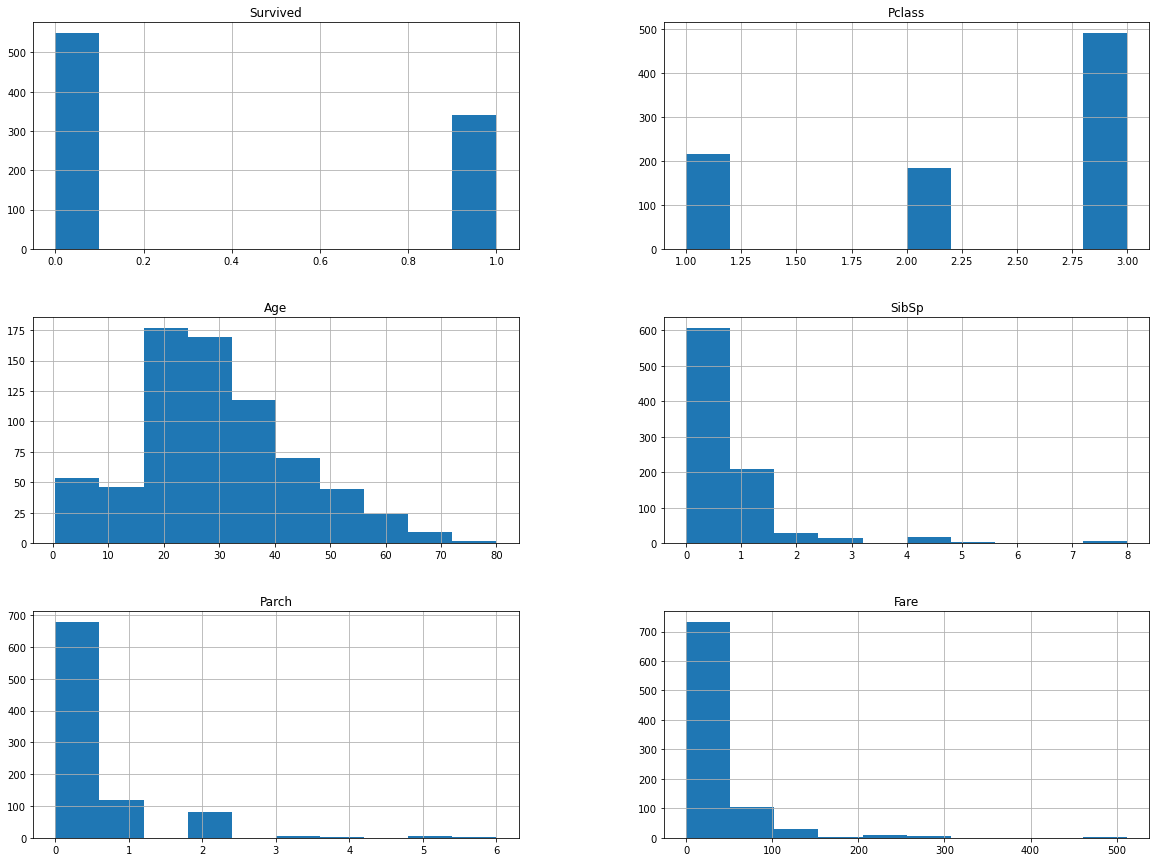

In [9]:
# dropping passenger id, create histogram for the rest of the columns in the dataframe to check the
# distribution of the data
train_df.drop(columns = 'PassengerId').hist(bins =10 , figsize=(20,15))
plt.show()

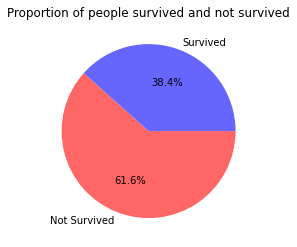

In [10]:
# get the total number of values for each unique value in the survived column
counts = train_df['Survived'].value_counts()
# rename the key 0 to Not Survived and 1 to Survived
counts.rename(index = {0:'Not Survived', 1: 'Survived'}, inplace =True)
# create a pie chart for the occurrence of each unique value in the survived column
fig=plt.pie(counts , labels = counts.index , autopct='%1.1f%%', colors=['#FF6666', '#6666FF'], counterclock=False)
plt.title("Proportion of people survived and not survived")
plt.show()

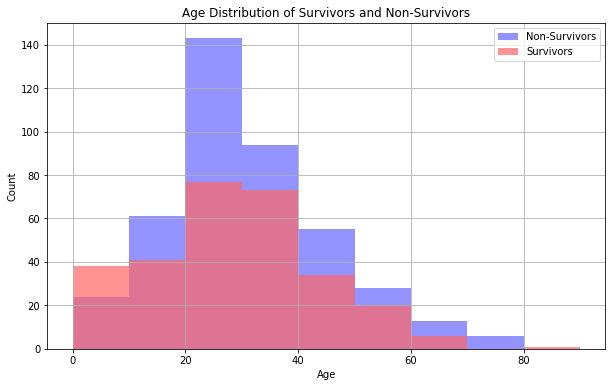

In [11]:
# Filter data for survivors and non-survivors
survivors = train_df[train_df['Survived'] == 1]
non_survivors = train_df[train_df['Survived'] == 0]

# Create bins with a difference of 10
bins = range(0, 91, 10)  # Bins from 0 to 90 with a step of 10

# Create a histogram for the age distribution of survivors
plt.figure(figsize=(10, 6))
plt.hist(non_survivors['Age'].dropna(), bins=bins, color='#6666FF', alpha=0.7, label='Non-Survivors')
plt.hist(survivors['Age'].dropna(), bins=bins, color='#FF6666', alpha=0.7, label='Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.grid(True)

# Display the histogram
plt.show()

## Training the Model

In [12]:
# target variable for training
y = train_df["Survived"]

# features that will be shown to the machine learning model during training
features = ["Pclass", "Sex", "SibSp", "Parch"]
# create a dataset from training dataframe using only above features
X = pd.get_dummies(train_df[features])
# create dataset from testing dataframe using only above features
X_test = pd.get_dummies(test_df[features])

In [13]:
# creating Logistic Regression model on the created training dataframe and target variable
lr_model = LogisticRegression(solver='liblinear', max_iter=200)
lr_model.fit(X, y)

# calculate accuracy on the training data
train_accuracy = accuracy_score(y, lr_model.predict(X))
print("Logistic Regression Training Accuracy:", train_accuracy)

Logistic Regression Training Accuracy: 0.8002244668911336


In [14]:
# creating Random Forest model on the created dataframe and target variable
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X, y)

# calculate accuracy on the training data
train_accuracy = accuracy_score(y, rf_model.predict(X))
print("Random Forest Classifier Training Accuracy:", train_accuracy)

Random Forest Classifier Training Accuracy: 0.8159371492704826


In [15]:
# since Random Forest performed better, we'll use it for predictions
predictions = rf_model.predict(X_test)

In [16]:
# save the predicted results into a csv file
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('predictions.csv', index=False)